#**Glass Problem**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [59]:
glass=pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
glass.shape

(214, 10)

In [61]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [62]:
glass.duplicated().sum()

1

In [63]:
glass=glass.drop_duplicates()

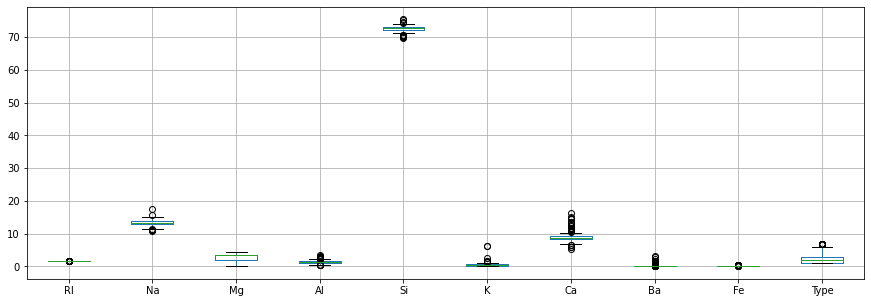

In [64]:
glass.boxplot(figsize=(15,5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3d8cdeaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3d8c691f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3d8cde790>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3d8c698b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3d8c69bb0>],
 'means': []}

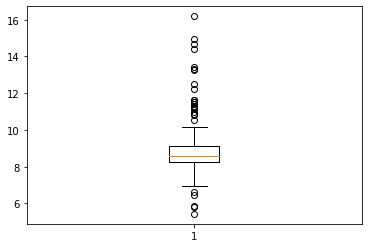

In [65]:
plt.boxplot(glass['Ca'])

In [66]:
glass=glass.drop(glass[glass['Ca']>10].index,axis=0)

In [67]:
glass=glass.drop(glass[glass['Ca']<7].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3d8c373d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3d8c37a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3d8c37070>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3d8c42190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3d8c42490>],
 'means': []}

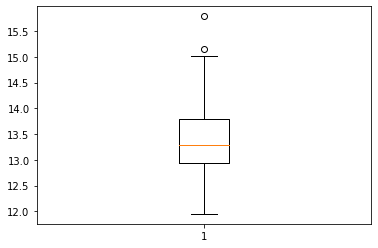

In [68]:
plt.boxplot(glass['Na'])

In [69]:
glass=glass.drop(glass[glass['Na']>15.0].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3da983610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3da93c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3da983dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3da8a8310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3da9d9430>],
 'means': []}

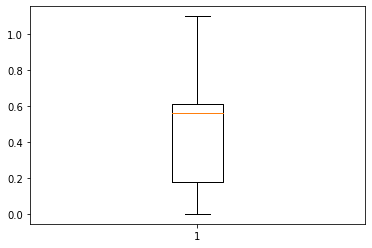

In [72]:
plt.boxplot(glass['K'])

In [71]:
glass=glass.drop(glass[glass['K']>2.0].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3da7e77f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3da801f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3da986e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3da7fc9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3da813c10>],
 'means': []}

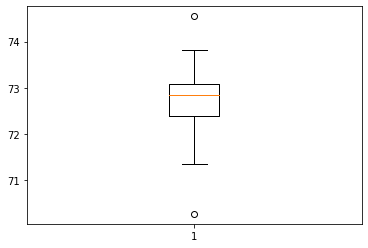

In [73]:
plt.boxplot(glass['Si'])

In [74]:
glass=glass.drop(glass[glass['Si']>74].index,axis=0)

In [75]:
glass=glass.drop(glass[glass['Si']<72].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3d8af9130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3d8af97f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3d8bbed90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3d8af9eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3d8b031f0>],
 'means': []}

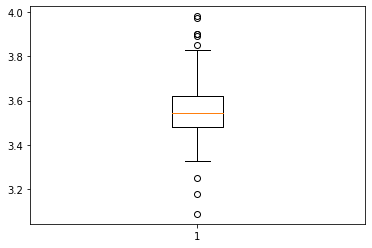

In [78]:
plt.boxplot(glass['Mg'])

In [77]:
glass=glass.drop(glass[glass['Mg']<3].index,axis=0)

In [79]:
glass.shape

(118, 10)

In [86]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.149556,0.320724,-0.546795,-0.468872,-0.433867,0.701762,0.107186,0.015476,0.024139
Na,0.149556,1.000000,0.147761,-0.192800,-0.606838,-0.350471,-0.121275,0.043441,-0.223707,0.147154
Mg,0.320724,0.147761,1.000000,-0.298232,-0.262341,-0.253783,0.040101,-0.015846,-0.013317,-0.109347
Al,-0.546795,-0.192800,-0.298232,1.000000,0.114016,0.592191,-0.666847,-0.207488,-0.122129,0.149148
Si,-0.468872,-0.606838,-0.262341,0.114016,1.000000,0.200536,-0.333687,0.019262,0.014603,-0.195811
K,-0.433867,-0.350471,-0.253783,0.592191,0.200536,1.000000,-0.534808,-0.126125,-0.020757,0.030883
Ca,0.701762,-0.121275,0.040101,-0.666847,-0.333687,-0.534808,1.000000,0.076158,0.217549,-0.085032
Ba,0.107186,0.043441,-0.015846,-0.207488,0.019262,-0.126125,0.076158,1.000000,0.298245,0.093473
Fe,0.015476,-0.223707,-0.013317,-0.122129,0.014603,-0.020757,0.217549,0.298245,1.000000,-0.078361
Type,0.024139,0.147154,-0.109347,0.149148,-0.195811,0.030883,-0.085032,0.093473,-0.078361,1.000000


In [80]:
array=glass.values
X=array[:,0:9]
Y=array[:,9]

##grid search

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [83]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [84]:
print(grid.best_score_)
print(grid.best_params_)

0.6869565217391305
{'n_neighbors': 6}


#visualization

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear

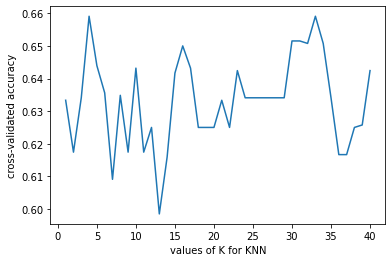

In [85]:
import matplotlib.pyplot as plt

k_range=range(1,41)
k_scores=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X,Y,cv=10)
  k_scores.append(scores.mean())

plt.plot(k_range,k_scores)

plt.xlabel('values of K for KNN')
plt.ylabel('cross-validated accuracy')
plt.show();

#**Zoo Problem**

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [88]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo.csv


In [99]:
zoo=pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [100]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [101]:
zoo.duplicated().sum()

0

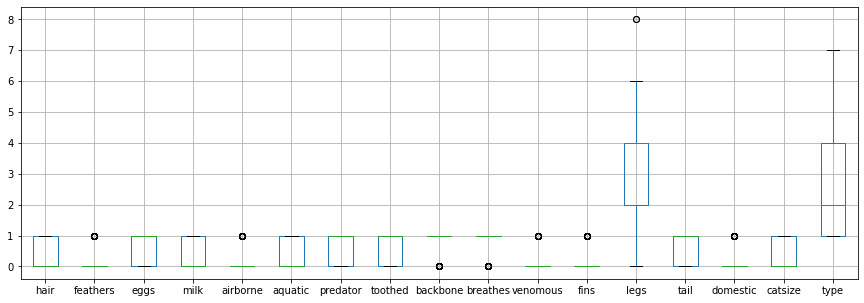

In [102]:
zoo.boxplot(figsize=(15,5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3d2942040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3d29425b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3d2937ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3d2942c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3d2942f70>],
 'means': []}

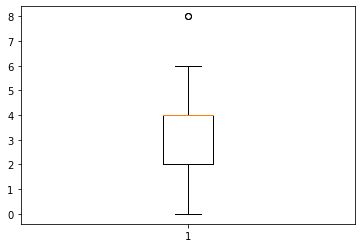

In [103]:
plt.boxplot(zoo['legs'])

In [104]:
zoo=zoo.drop(zoo[zoo['legs']>6].index,axis=0)

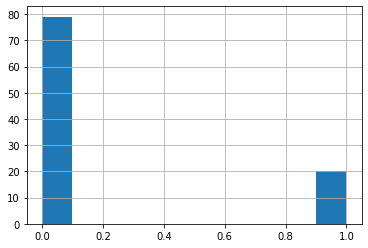

In [105]:
zoo['feathers'].hist()

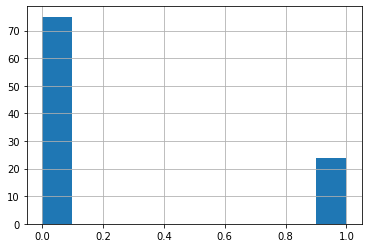

In [106]:
zoo['airborne'].hist()

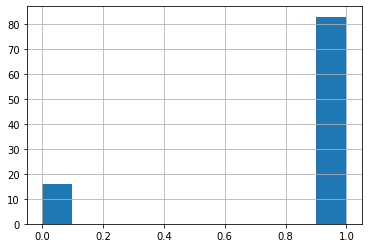

In [107]:
zoo['backbone'].hist()

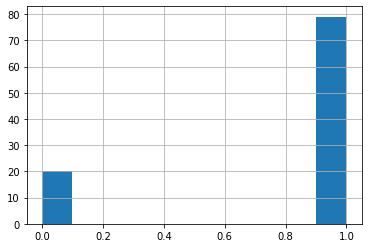

In [109]:
zoo['breathes'].hist()

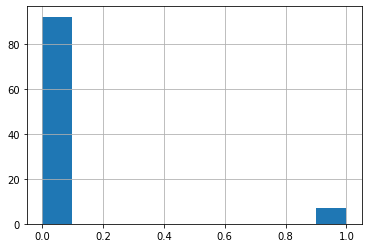

In [110]:
zoo['venomous'].hist()

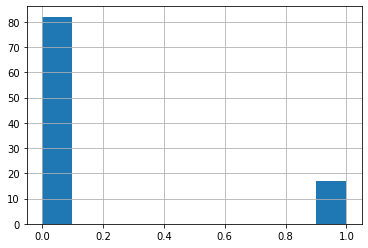

In [111]:
zoo['fins'].hist()

In [112]:
zoo1=zoo.drop('animal name',axis=1)
zoo1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [113]:
zoo1.shape

(99, 17)

In [114]:
array=zoo1.values
X=array[:,0:16]
Y=array[:,16]

##grid search

In [115]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [116]:
mod=KNeighborsClassifier()
grid=GridSearchCV(estimator=mod,param_grid=param_grid)
grid.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [117]:
print(grid.best_score_)
print(grid.best_params_)

0.9794736842105264
{'n_neighbors': 1}


#visualization

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear

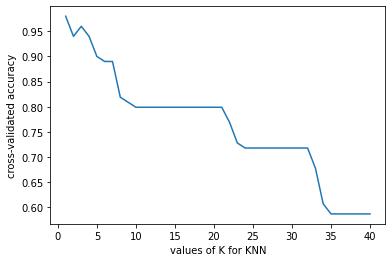

In [118]:
import matplotlib.pyplot as plt

k_range=range(1,41)
k_scores=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X,Y,cv=10)
  k_scores.append(scores.mean())

plt.plot(k_range,k_scores)

plt.xlabel('values of K for KNN')
plt.ylabel('cross-validated accuracy')
plt.show()